In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv("auto0-20231226-141335-673928667-de_mirage-_cz__siddhesh_game_server-430591.csv")
df.head(5)

,currentTick,playerId,X,Y,Z,deltaX,deltaY,deltaZ,yaw,pitch,...,distToTarget,targetHitArea,penetratedObject,weaponUsed,weaponCategory,isScoping,isTargetBlind,isTargetInSmoke,targetReturnedDmg,Label
0,0.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,3.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,4.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,5.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


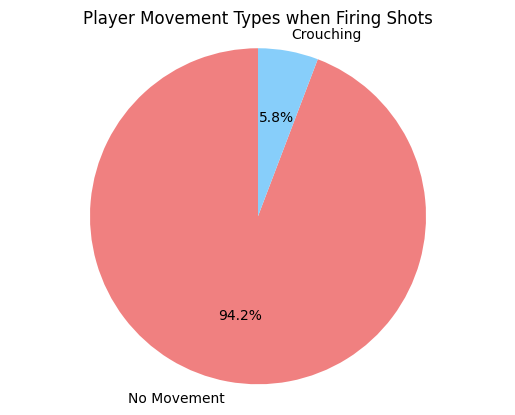

In [79]:
def analyze_movement_types(dataframe):
    
    filtered_data = dataframe

    
    crouching_count = filtered_data['isCrouching'].sum() if 'isCrouching' in filtered_data else 0
    jumping_count = filtered_data['isJumping'].sum() if 'isJumping' in filtered_data else 0
    no_movement_count = len(filtered_data) - (crouching_count + jumping_count)

    return crouching_count, jumping_count, no_movement_count



crouching_count, jumping_count, no_movement_count = analyze_movement_types(df)


labels = []
sizes = []

if crouching_count > 0:
    labels.append('Crouching')
    sizes.append(crouching_count)

if jumping_count > 0:
    labels.append('Jumping')
    sizes.append(jumping_count)

if no_movement_count > 0:
    labels.append('No Movement')
    sizes.append(no_movement_count)


labels, sizes = zip(*sorted(zip(labels, sizes), key=lambda x: x[1], reverse=True))


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
ax.axis('equal')  


ax.set_aspect('equal')


plt.title('Player Movement Types when Firing Shots')


plt.show()